# Getting the Data

In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

### Whether Data

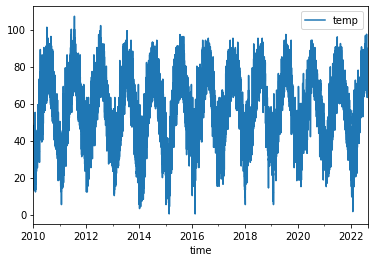

In [12]:
'''
Column	Description	Type
station	The Meteostat ID of the weather station (only if query refers to multiple stations)	String
time	The datetime of the observation	Datetime64
temp	The air temperature in °C	Float64
dwpt	The dew point in °C	Float64
rhum	The relative humidity in percent (%)	Float64
prcp	The one hour precipitation total in mm	Float64
snow	The snow depth in mm	Float64
wdir	The average wind direction in degrees (°)	Float64
wspd	The average wind speed in km/h	Float64
wpgt	The peak wind gust in km/h	Float64
pres	The average sea-level air pressure in hPa	Float64
tsun	The one hour sunshine total in minutes (m)	Float64
coco	The weather condition code	Float64
'''




# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Hourly

# Set time period
start = datetime(2010, 1, 1)
end = datetime(2022, 8, 31)

# Create Point for Vancouver, BC
NewYorkCity = Point(lat=40.730610,lon= -73.935242, alt=70)

# Get Hourly data for 2018
data = Hourly(NewYorkCity, start, end)
data = data.fetch()

# Convert Celsius to Fahrenheit
data["temp"] = data.temp.apply(lambda x: (x*(9/5)) + 32)

# Plot line chart including average, minimum and maximum temperature
data.plot(y=["temp"])
plt.show()

In [13]:
data

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2010-01-01 00:00:00,34.34,-3.2,72.0,NaN,NaN,NaN,0.0,NaN,1018.3,NaN,NaN
2010-01-01 01:00:00,33.26,-1.1,88.0,0.0,NaN,40.0,5.4,NaN,1017.7,NaN,NaN
2010-01-01 02:00:00,33.26,-1.1,88.0,0.5,NaN,30.0,0.0,NaN,1017.5,NaN,NaN
2010-01-01 03:00:00,33.26,-1.1,88.0,0.8,NaN,NaN,0.0,NaN,1016.8,NaN,NaN
2010-01-01 04:00:00,32.36,-0.4,96.0,0.3,NaN,60.0,9.4,NaN,1016.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-30 20:00:00,83.48,19.2,57.0,0.0,NaN,160.0,6.0,NaN,1009.0,NaN,3.0
2022-08-30 21:00:00,81.68,19.9,63.0,0.0,NaN,165.0,9.0,NaN,1009.0,NaN,2.0
2022-08-30 22:00:00,80.24,20.6,69.0,0.0,NaN,164.0,5.4,NaN,1007.8,NaN,3.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 111001 entries, 2010-01-01 00:00:00 to 2022-08-31 00:00:00
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    111001 non-null  float64
 1   dwpt    111001 non-null  float64
 2   rhum    111001 non-null  float64
 3   prcp    107272 non-null  float64
 4   snow    0 non-null       float64
 5   wdir    107366 non-null  float64
 6   wspd    111001 non-null  float64
 7   wpgt    0 non-null       float64
 8   pres    110863 non-null  float64
 9   tsun    0 non-null       float64
 10  coco    39321 non-null   float64
dtypes: float64(11)
memory usage: 10.2 MB


In [19]:
data.isnull().sum()

temp         0
dwpt         0
rhum         0
prcp      3729
snow    111001
wdir      3635
wspd         0
wpgt    111001
pres       138
tsun    111001
coco     71680
dtype: int64

In [20]:
# make subset data frame, removing features with all NaN values
data2 = data.drop(["snow", "wpgt", "tsun"], axis=1).copy()
data2.dtypes

temp    float64
dwpt    float64
rhum    float64
prcp    float64
wdir    float64
wspd    float64
pres    float64
coco    float64
dtype: object

In [194]:
data2.reset_index().to_csv("./data/Hourly_Weather_Data_01Jan2010_thru_31Aug2022.csv", index=False)

In [21]:
# data.to_csv("./data/Hourly_Weather_Data_01Jan2010_thru_31Aug2022.csv", index=False)

### MTA Subway Turnstile Data

In [199]:
## Format Initial Data Columns
def format_init(df):
    df.columns = df.columns.str.strip()
    df["DateTime"] = pd.to_datetime(df["DATE"].astype(str) + " " + df["TIME"])
    df["Date"] = pd.to_datetime(df["DATE"], format="%m/%d/%Y")
    df["Time"] = pd.to_datetime(mta_df.loc[:,"TIME"], format="%H:%M:%S").dt.time
    df["Entries"] = df["ENTRIES"].fillna(0.0).astype("float64")
    df["Exits"] = df["EXITS"].fillna(0.0).astype("float64")
    df["Station"] = df["STATION"]#.astype("category")
    df["Division"] = df["DIVISION"]#.astype("category")
    df["Desc"] = df["DESC"]#.astype("category")
    df["Turnstile_ID"] = df["C/A"] + "-" + df["UNIT"] + "-" + df["SCP"]
    df.rename(columns={"LINENAME": "LineName"}, inplace=True)
    return df[['DateTime', 'Date', 'Time', 'Division', 'Desc', 
               'Station', 'LineName', 'Turnstile_ID', 
               'Entries', 'Exits']].set_index("DateTime")

## Add Time Features
def add_time_features(df):
    # Year
    df["Year"] = pd.to_numeric(df.index.year, downcast='integer')
    # Month
    df["Month"] = pd.to_numeric(df.index.month, downcast='integer')
    # Day
    df["Day"] = pd.to_numeric(df.index.day, downcast='integer')
    # Day of Week Index and Spelled Out
    df["DOW_Index"] = pd.to_numeric(df.index.weekday, downcast='integer')
    df["DOW"] = df.index.day_name()#.astype("category")
    # Hour (Roundest to the nearest Hour)
    df["Hour"] = pd.to_numeric(df.index.round('H').hour, downcast='integer')
    #pd.to_numeric(s, downcast='integer')
    return df#.set_index("Date")
    

## Add Train Line Features
def add_trainline_features(df):
    # Get unique list of Train Lines
    TrainLines = sorted(list(set([*"".join(df.LineName.unique())])))
    # Create Feature for Each Line and Enter Boolean Value if Observation contains Line
    for t in TrainLines:
        df[("Line_" + t)] = df["LineName"].apply(lambda x: True if t in x else False)
    return df

In [126]:
def Fetch_Turnstile_Data(start_date, num_weeks, version):
    #initialise the number of weeks for the dataset
    #initialise the date for the first week of the dataset (week ending on start_date)
    filedate = start_date

    #initialise the regex for the MTA turnstile url
    filename_regex = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    if version.lower() == "new":
        # Column Names since older data does not come labeled
        cols = ['C/A', 'UNIT', 'SCP', 'STATION', 
                'LINENAME', 'DIVISION', 'DATE', 
                'TIME', 'DESC', 'ENTRIES', 'EXITS']
        
        filelist = []
        for numfiles in range(num_weeks):
            # create the appropriate filename for the week
            filedate_str = str(filedate.year)[2:4] + str(filedate.month).zfill(2) + str(filedate.day).zfill(2)
            filename = filename_regex.format(filedate_str)
            # read the file and append it to the list of files to be concacated
            df = pd.read_csv(filename, parse_dates=['DATE'], keep_date_col=True)
            filelist.append(df)
            # advance to the next week
            filedate += pd.Timedelta(days=7)
            
        mta__origin_data = pd.concat(filelist, axis=0, ignore_index=True)
        return(mta__origin_data)
        
        
    else:
        cols = ["C/A", "Unit", "SCP", 
                "Date1", "Time1", "Entries1", "Exits1", 
                "Date2", "Time2", "Entries2", "Exits2", 
                "Date3", "Time3", "Entries3", "Exits3"
                "Date4", "Time4", "Entries4", "Exits4", 
                "Date5", "Time5", "Entries5", "Exits5", 
                "Date6", "Time6", "Entries6", "Exits6"]
        cols = ['C/A', 'UNIT', 'SCP', 'STATION', 
                'LINENAME', 'DIVISION', 'DATE', 
                'TIME', 'DESC', 'ENTRIES', 'EXITS']
        
        filelist = []
        for numfiles in range(num_weeks):
            # create the appropriate filename for the week
            filedate_str = str(filedate.year)[2:4] + str(filedate.month).zfill(2) + str(filedate.day).zfill(2)
            filename = filename_regex.format(filedate_str)
            # read the file and append it to the list of files to be concacated
            df = pd.read_csv(filename, sep=" ", header=None)
            filelist.append(df)
            # advance to the next week
            filedate += pd.Timedelta(days=7)
            
        mta__origin_data = pd.concat(filelist, axis=0, ignore_index=True)
        return(mta__origin_data)

In [128]:
New_Data = Fetch_Turnstile_Data(pd.Timestamp('2014-10-18 00:00:00'), 414, "new")
New_Data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,2014-10-11,01:00:00,REGULAR,805439.0,1141080.0
1,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,2014-10-11,05:00:00,REGULAR,805459.0,1141141.0
2,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,2014-10-11,09:00:00,REGULAR,805589.0,1141257.0
3,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,2014-10-11,13:00:00,REGULAR,805834.0,1141512.0
4,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,2014-10-11,17:00:00,REGULAR,806150.0,1141903.0
...,...,...,...,...,...,...,...,...,...,...,...
83129623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-09-16,05:00:00,REGULAR,0.0,804.0
83129624,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-09-16,09:00:00,REGULAR,0.0,804.0
83129625,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-09-16,13:00:00,REGULAR,0.0,804.0
83129626,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2022-09-16,17:00:00,REGULAR,0.0,804.0


In [129]:
# Make Copy of Data to perform EDA
mta_df = New_Data.copy()

In [130]:
len(mta_df.STATION.unique())

572

In [200]:
mta_df = format_init(mta_df)
mta_df.head()

,Date,Time,Division,Desc,Station,LineName,Turnstile_ID,Entries,Exits
DateTime,,,,,,,,,
2014-10-11 01:00:00,2014-10-11,01:00:00,BMT,REGULAR,WHITEHALL ST,R1,A060-R001-00-00-00,805439.0,1141080.0
2014-10-11 05:00:00,2014-10-11,05:00:00,BMT,REGULAR,WHITEHALL ST,R1,A060-R001-00-00-00,805459.0,1141141.0
2014-10-11 09:00:00,2014-10-11,09:00:00,BMT,REGULAR,WHITEHALL ST,R1,A060-R001-00-00-00,805589.0,1141257.0
2014-10-11 13:00:00,2014-10-11,13:00:00,BMT,REGULAR,WHITEHALL ST,R1,A060-R001-00-00-00,805834.0,1141512.0
2014-10-11 17:00:00,2014-10-11,17:00:00,BMT,REGULAR,WHITEHALL ST,R1,A060-R001-00-00-00,806150.0,1141903.0


In [201]:
mta_df = add_time_features(mta_df.copy())
mta_df.head()

,Date,Time,Division,Desc,Station,LineName,Turnstile_ID,Entries,Exits,Year,Month,Day,DOW_Index,DOW,Hour
DateTime,,,,,,,,,,,,,,,
2014-10-11 01:00:00,2014-10-11,01:00:00,BMT,REGULAR,WHITEHALL ST,R1,A060-R001-00-00-00,805439.0,1141080.0,2014,10,11,5,Saturday,1
2014-10-11 05:00:00,2014-10-11,05:00:00,BMT,REGULAR,WHITEHALL ST,R1,A060-R001-00-00-00,805459.0,1141141.0,2014,10,11,5,Saturday,5
2014-10-11 09:00:00,2014-10-11,09:00:00,BMT,REGULAR,WHITEHALL ST,R1,A060-R001-00-00-00,805589.0,1141257.0,2014,10,11,5,Saturday,9
2014-10-11 13:00:00,2014-10-11,13:00:00,BMT,REGULAR,WHITEHALL ST,R1,A060-R001-00-00-00,805834.0,1141512.0,2014,10,11,5,Saturday,13
2014-10-11 17:00:00,2014-10-11,17:00:00,BMT,REGULAR,WHITEHALL ST,R1,A060-R001-00-00-00,806150.0,1141903.0,2014,10,11,5,Saturday,17


In [202]:
# mta_df.to_csv("./data/Turnstile_Usage_Data_2014-10-18_thru_2022-09-24.csv", index=True)

In [57]:
mta_df.isnull().sum()

C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
DATE/TIME    0
DATETIME     0
DOW_INDEX    0
DOW          0
MONTH        0
HOUR         0
dtype: int64

In [16]:
mta_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'DATE/TIME'],
      dtype='object')

In [20]:
mta_df.rename(columns={'EXITS                                                               ': 'EXITS'}, inplace=True)

In [21]:
mta_df["DATETIME"].min()

Timestamp('2017-09-23 00:00:00')

In [22]:
mta_df["DATETIME"].max()

Timestamp('2022-08-26 23:00:00')

In [45]:
mta_df.TIME.unique()

array(['00:00:00', '04:00:00', '08:00:00', ..., '15:59:34', '23:06:04',
       '03:18:04'], dtype=object)

In [38]:
## gets the number of entries and exits
mta_entries = mta_df.groupby(['STATION','C/A','UNIT','SCP','DATE/TIME']).ENTRIES.max() - mta_df.groupby(['STATION','C/A','UNIT','SCP','DATETIME']).ENTRIES.min()
mta_exits = mta_df.groupby(['STATION','C/A','UNIT','SCP','DATE/TIME']).EXITS.max() - mta_df.groupby(['STATION','C/A','UNIT','SCP','DATETIME']).EXITS.min()

## flattens the data
mta_entries_flat = mta_entries.reset_index()
mta_exits_flat = mta_exits.reset_index()

mta_entries_exits = pd.merge(mta_entries_flat, mta_exits_flat, how='outer')

## append weekday and traffic column to dataset
mta_entries_exits['WEEKDAY'] = mta_entries_exits['DATE/TIME'].dt.day_name()
mta_entries_exits['TRAFFIC'] = mta_entries_exits['ENTRIES'] + mta_entries_exits['EXITS']
mta_entries_exits['WEEKDAY_INDEX'] = mta_entries_exits['DATE/TIME'].dt.weekday

In [39]:
mta_entries_exits[mta_entries_exits.ENTRIES == mta_entries_exits.ENTRIES.max()]

,STATION,C/A,UNIT,SCP,DATE/TIME,ENTRIES,EXITS,WEEKDAY,TRAFFIC,WEEKDAY_INDEX
14131293,57 ST-7 AV,A011,R080,01-00-03,2018-12-30 15:00:00,1663107803,1256075905,Sunday,2919183708,6


In [34]:
mta_entries_exits.ENTRIES.max()

2146429625

In [36]:
len(mta_entries_exits.DATE.unique())

1799

In [40]:
mta_entries_exits.sort_values(["DATE/TIME"])

,STATION,C/A,UNIT,SCP,DATE/TIME,ENTRIES,EXITS,WEEKDAY,TRAFFIC,WEEKDAY_INDEX
0,1 AV,H007,R248,00-00-00,2017-09-23 00:00:00,0,0,Saturday,0,5
13317135,50 ST,R155,R116,01-00-00,2017-09-23 00:00:00,0,0,Saturday,0,5
13306314,50 ST,R154,R116,00-03-02,2017-09-23 00:00:00,0,0,Saturday,0,5
13295485,50 ST,R154,R116,00-03-01,2017-09-23 00:00:00,0,0,Saturday,0,5
13284652,50 ST,R154,R116,00-03-00,2017-09-23 00:00:00,0,0,Saturday,0,5
...,...,...,...,...,...,...,...,...,...,...
33185073,FULTON ST,A077,R028,03-03-01,2022-08-26 23:00:00,0,0,Friday,0,4
33597722,FULTON ST,N098,R028,00-00-01,2022-08-26 23:00:00,0,0,Friday,0,4
33868854,FULTON ST,R113,R028,01-06-03,2022-08-26 23:00:00,0,0,Friday,0,4
33879651,FULTON ST,R114,R028,02-00-00,2022-08-26 23:00:00,0,0,Friday,0,4
